In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path

In [26]:
def shape_curve_frame(path: Path):
    df = pd.read_csv(path, index_col=0, header=[0,1]).stack(level=[0,1])
    df.name = 'value'
    df.index.set_names(['epoch', 'set', 'metric'], inplace=True)
    return df.to_frame()

learning_curves = pd.concat(
    {
        result_dir.name: shape_curve_frame(result_dir / 'loss.csv')
        for result_dir in Path('../ax_out').iterdir() if result_dir.is_dir()
    },
    names = ['model']
)

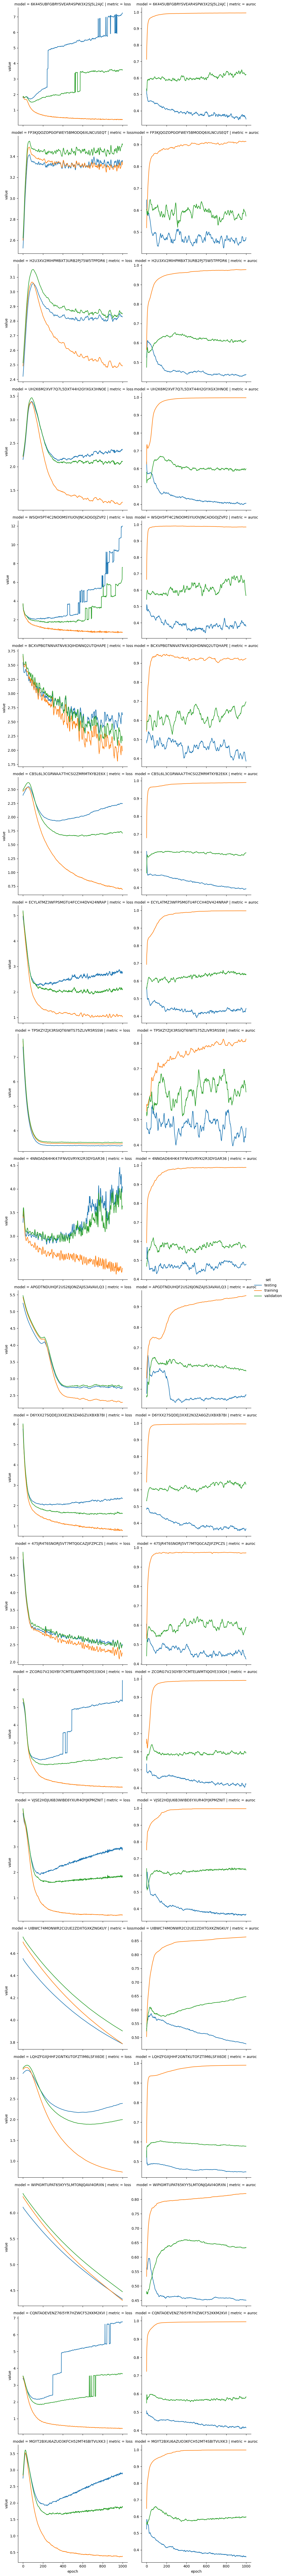

In [29]:
sns.relplot(
    learning_curves,
    x='epoch',
    y='value',
    col='metric',
    row='model',
    hue='set',
    kind='line',
    facet_kws={'sharey': False, 'margin_titles': True}
)

In [31]:
import json
def read_json(path: Path):
    with path.open('rt') as in_stream:
        return json.load(in_stream)

param_specs = {
    param_file.stem: read_json(param_file)
    for param_file in Path('../ax_in').iterdir()
}

In [33]:
pd.DataFrame(param_specs).transpose()

,architecture,channel_width,decoder_depth,dropout_rate,encoder_depth,gnn_depth,learning_rate
TP5KZYZJX3RSIQT6IWTS75ZLIVR5RSSW,NNConvNet,1,0,0.946767,1,0,0.007622
6K445UBFGBRYSVEAR4SPW3X2SJ5L2AJC,NNConvNet,1,0,0.178993,1,0,0.009423
WIPIGMTUPAT65KYY5LMTONJQAVI4ORXN,NNConvNet,1,0,0.474023,1,0,0.000375
WSQH5PT4C2NOOMSYIUOVJNCADGOJZVP2,NNConvNet,1,0,0.610804,1,0,0.009689
D6YXX27SQDEJ3XXE2N3ZA6GZUXBXB7BI,NNConvNet,1,0,0.552234,1,0,0.005843
4NNOAD64HK47IFNVGVRYKI2R3DYGAR36,NNConvNet,1,0,0.667858,1,0,0.008136
475JR4T6SNORJ5VT7MTQGCAZJIFZPCZS,NNConvNet,1,0,0.905499,1,0,0.004282
CQNTAOEVENZ76I5YR7HZWCF52KKM2KVI,NNConvNet,1,0,0.079332,1,0,0.005893
CB5L6L3CGRWAA7THCSI2ZMRMTKYB2E6X,NNConvNet,1,0,0.298095,1,0,0.002778
UIBWC74MONWR2CI2UE2ZDXTGXKZNGKUY,NNConvNet,1,0,0.383446,1,0,0.000207
